






<h2 id='part1'>Initial Look at Data</h2>

In order to get a better understanding of the Trip Advisor European restaurants dataset, let's take a look at some of its characteristics.

First, let's read in the data and necessary libraries, and print the first and last 5 lines of the dataset.

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('./TA_restaurants_curated.csv')
df.head() #print first 5 lines

,IndexWithinCity,Name,City,CuisineStyle,Ranking,Rating,PriceRange,NumberOfReviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Moderate,136.0,"[['Just like home', 'A Warm Welcome to Wintry Amsterdam'], ['01/03/2018', '01/01/2018']]",/Restaurant_Review-g188590-d11752080-Reviews-Martine_of_Martine_s_Table-Amsterdam_North_Holland_Province.html,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', 'Gluten Free Options']",2.0,4.5,High,812.0,"[['Great food and staff', 'just perfect'], ['01/06/2018', '01/04/2018']]",/Restaurant_Review-g188590-d693419-Reviews-De_Silveren_Spiegel-Amsterdam_North_Holland_Province.html,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', 'European', 'Vegetarian Friendly', 'Vegan Options']",3.0,4.5,High,567.0,"[['Satisfaction', 'Delicious old school restaurant'], ['01/04/2018', '01/04/2018']]",/Restaurant_Review-g188590-d696959-Reviews-La_Rive-Amsterdam_North_Holland_Province.html,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Contemporary', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",4.0,5.0,High,564.0,"[['True five star dinner', 'A superb evening of fine dining, hospitali...'], ['12/20/2017', '12/17/2017']]",/Restaurant_Review-g188590-d1239229-Reviews-Vinkeles-Amsterdam_North_Holland_Province.html,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",5.0,4.5,High,316.0,"[['Best meal.... EVER', 'super food experience'], ['01/06/2018', '01/04/2018']]",/Restaurant_Review-g188590-d6864170-Reviews-Librije_s_Zusje_Amsterdam-Amsterdam_North_Holland_Province.html,d6864170


In [168]:
df.tail() #print last 5 lines

,IndexWithinCity,Name,City,CuisineStyle,Ranking,Rating,PriceRange,NumberOfReviews,Reviews,URL_TA,ID_TA
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-Konrad_Kaffee_Cocktailbar-Zurich.html,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-Blueberry_American_Bakery-Zurich.html,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-Restaurant_Bahnhof-Zurich.html,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Yoyo_Pizza-Zurich.html,d13323362
125526,1666,dieci,Zurich,"['Italian', 'Pizza', 'Mediterranean', 'Diner']",NaN,NaN,Moderate,NaN,NaN,/Restaurant_Review-g188113-d13349842-Reviews-Dieci-Zurich.html,d13349842


Now let's find out how many rows and columns it has (of course, we can also easily count the columns in the tables above).

In [169]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print (num_rows)
print (num_cols)

125527
11


<h2 id='part1'>Remove Unnecessary Columns</h2>

Let's start with IndexWithinCity and ID_TA (TA = Trip Advisor). We're going to focus on cumulative analysis of cities and cuisine styles, not analysis of individual restaurants, so let's remove those two columns. We'll keep the Name column just to be safe, in case we decide we do need to access a particular row.

In [170]:
df.drop('IndexWithinCity', axis=1, inplace=True)
df.drop('ID_TA', axis=1, inplace=True)

And Rating (1 to 5 stars, in increments of 0.5) will be our restaurant quality metric, so we don't need the Ranking column.

In [171]:
df.drop('Ranking', axis=1, inplace=True)

Now we should decide if the Reviews and URL_TA columns are useful. In our initial view of the head and tail of the datset, those columns were too narrow to fully see them, so let's fix that by setting **display.max_colwidth** to None. Then we display the head of those columns.

In [172]:
pd.set_option('display.max_colwidth', None)
df.head().Reviews

0                      [['Just like home', 'A Warm Welcome to Wintry Amsterdam'], ['01/03/2018', '01/01/2018']]
1                                      [['Great food and staff', 'just perfect'], ['01/06/2018', '01/04/2018']]
2                           [['Satisfaction', 'Delicious old school restaurant'], ['01/04/2018', '01/04/2018']]
3    [['True five star dinner', 'A superb evening of fine dining, hospitali...'], ['12/20/2017', '12/17/2017']]
4                               [['Best meal.... EVER', 'super food experience'], ['01/06/2018', '01/04/2018']]
Name: Reviews, dtype: object

In [173]:
df.head().URL_TA

0    /Restaurant_Review-g188590-d11752080-Reviews-Martine_of_Martine_s_Table-Amsterdam_North_Holland_Province.html
1             /Restaurant_Review-g188590-d693419-Reviews-De_Silveren_Spiegel-Amsterdam_North_Holland_Province.html
2                         /Restaurant_Review-g188590-d696959-Reviews-La_Rive-Amsterdam_North_Holland_Province.html
3                       /Restaurant_Review-g188590-d1239229-Reviews-Vinkeles-Amsterdam_North_Holland_Province.html
4      /Restaurant_Review-g188590-d6864170-Reviews-Librije_s_Zusje_Amsterdam-Amsterdam_North_Holland_Province.html
Name: URL_TA, dtype: object

It's clear that **Reviews** contains just two reviews for each restaurant. **URL_TA** contains a link to what is likely the text of all the reviews for the restaurant in that row, but that doesn't seem appropriate either, given that our analysis will be quantitative.  So we'll drop both. 

In [174]:
df.drop('Reviews', axis=1, inplace=True)
df.drop('URL_TA', axis=1, inplace=True)

Let's confirm that we now have 6 columns, as we expect:

In [175]:
num_cols = df.shape[1] #Provide the number of columns in the dataset

print (num_cols)

6


### Remove Unnecessary or Undesirable Rows

Our dataset currently has 125527 rows, but all of our analysis will require a value for our quality metric (Rating) for each restaurant. Let's see how much data we lose if we remove all rows with Rating missing.  

In [182]:
df.dropna(subset=['Rating'], inplace=True)
num_rows = df.shape[0] #Provide the number of rows in the dataset

print (num_rows)

115897


From 125527 to 115897 is only an 8% decrease, so we'll leave those rows out instead of imputing values for their Rating. 

Now let's address the possibility that some restaurants may have too few reviews for their Rating scores to be reliable; i.e., the sample size is too small. Intuitively, it seems that we shouldn't include restaurants with fewer than 10 reviews, so let's remove those rows and see how many are left:

In [184]:
df = df[df['NumberOfReviews'] >= 10]
print (df.shape[0])

80420


From 115897 to 80420 is a 31% decrease, but keeping restaurants with fewer than 10 reviews feels risky, and ~80000 is still quite a large number of restaurants for our dataset.  This seems like a good compromise, but we should do one more check: let's make sure we have enough restaurants left in each city:

In [187]:
city_vals = df.City.value_counts() #Provide a pandas series of the counts for each city

# Create two separate DataFrames for the first 16 pairs and the next 15 pairs, to make display more compact
cv_left = pd.DataFrame({'City': city_vals[:16].index, 'Restaurants': city_vals[:16].values})
cv_right = pd.DataFrame({'City': city_vals[16:].index, 'Restaurants': city_vals[16:].values})
result = pd.concat([cv_left, cv_right], axis=1)
print(result)

         City  Restaurants        City  Restaurants
0      London        11445   Stockholm       1532.0
1       Paris        10421      Dublin       1444.0
2      Madrid         5932   Edinburgh       1421.0
3   Barcelona         5453  Copenhagen       1338.0
4        Rome         5334      Warsaw       1223.0
5       Milan         4683      Zurich       1112.0
6      Berlin         3805      Athens       1096.0
7      Lisbon         2526      Oporto       1061.0
8   Amsterdam         2400      Geneva        993.0
9      Prague         2381      Krakow        829.0
10     Vienna         2161        Oslo        803.0
11   Brussels         2119    Helsinki        737.0
12       Lyon         1934  Luxembourg        462.0
13     Munich         1906  Bratislava        425.0
14    Hamburg         1595   Ljubljana        289.0
15   Budapest         1560         NaN          NaN


We still have well over 200 restaurants in each city, so let's move on to our three questions.

### Question 1: Which cities have the most highly rated low and moderately priced restaurants?

First, we'll create a pandas series of the different **PriceRange** values in the dataset, and store the pandas series in **pricerange_vals**.  We'll use **dropna=False** so that restaurants whose **PriceRange** is missing will be shown as a group labeled "nan".

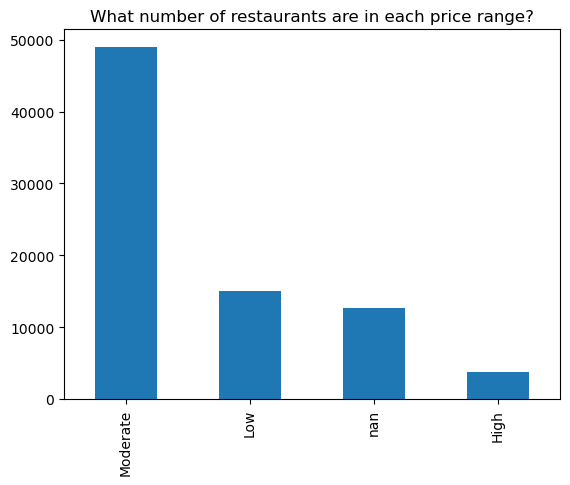

In [186]:
pricerange_vals = df.PriceRange.value_counts(dropna=False)#Provide a pandas series of the counts for each PriceRange

# The below will be a bar chart of the number of restaurants in each price range, 
# or with no value for price range (nan).

pricerange_vals.plot(kind="bar");
plt.title("What number of restaurants are in each price range?");

**Moderate** is by far the largest group, but **Low** has ~15000 restaurants, which should be sufficent for comparing average ratings across cities.

Let's first plot the mean rating of low priced restaturants by city, and then the mean rating of moderately priced ones.

Text(0.5, 1.0, 'Average rating of restaurants in PriceRange = Low')

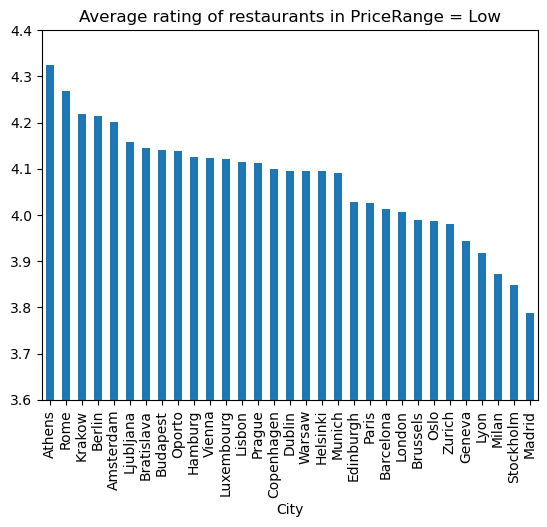

In [198]:
price_low = df[df['PriceRange'] == 'Low']
mean_rating_by_city = price_low.groupby('City')['Rating'].mean()
sorted_mean_rating = mean_rating_by_city.sort_values(ascending=False)
plt.ylim(3.6, 4.4)
sorted_mean_rating.plot(kind="bar")
plt.title("Average rating of restaurants in PriceRange = Low")

Text(0.5, 1.0, 'Average rating of restaurants in PriceRange = Moderate')

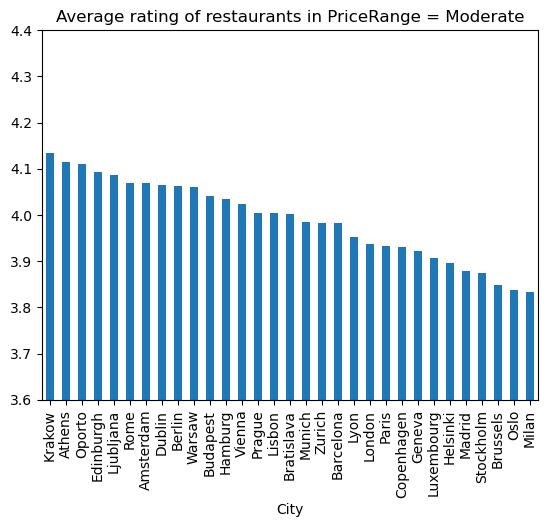

In [199]:
price_moderate = df[df['PriceRange'] == 'Moderate']
mean_rating_by_city = price_moderate.groupby('City')['Rating'].mean()
sorted_mean_rating = mean_rating_by_city.sort_values(ascending=False)
plt.ylim(3.6, 4.4)
sorted_mean_rating.plot(kind="bar")
plt.title("Average rating of restaurants in PriceRange = Moderate")

### Answer to Question 1

Athens, Krakow, Rome, Berlin, Amsterdam and Ljubljana all stand out. They're the 6 highest rated cities for low priced testaurants, and among the top 8 for moderately priced ones.

### Question 2: Regardless of price range, which cities have the most highly rated Mediterranean and Vegetarian Friendly restaurants?

For the rest of this notebook, we're going to analyze ratings of different cuisine styles, so we have no use for restaturants with no value in that column. Let's return to our "all price ranges" dataframe **df** and drop all rows with missing **CuisineStyle.** 

In [202]:
df.dropna(subset=['CuisineStyle'], inplace=True)
num_rows = df.shape[0] #Provide the number of rows in the dataset

print (num_rows)

71297


The last time we looked at **df,** it had 80420 rows, so we've removed just over 10% of those because **CuisineStyle** was missing. Now we'll search for the two styles we're interested in.

Many rows have multiple styles (separated by commas) in the **CuisineStyle** column, so we use the **str.contains** feature to search for Mediterranean. Then we output the total number of Mediterranean restaurants and plot their ratings by city, and repeat the process for Vegetarian Friendly restaurants.

In [203]:
mediter = df[df['CuisineStyle'].str.contains('Mediterranean')]
print (mediter.shape[0])

16441


Text(0.5, 1.0, 'Average rating of Mediterranean restaurants (across all price ranges)')

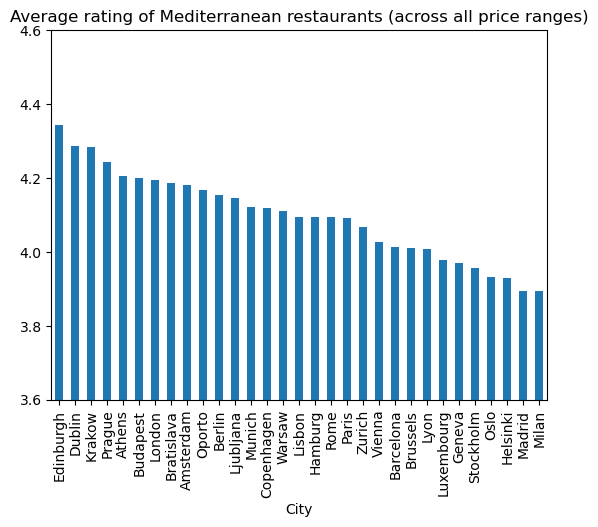

In [207]:
mediter_rating_by_city = mediter.groupby('City')['Rating'].mean()
sorted_mediter_rating = mediter_rating_by_city.sort_values(ascending=False)
plt.ylim(3.6, 4.6)
sorted_mediter_rating.plot(kind="bar")
plt.title("Average rating of Mediterranean restaurants (across all price ranges)")

In [205]:
veggie = df[df['CuisineStyle'].str.contains('Vegetarian Friendly')]
print (veggie.shape[0])

31853


Text(0.5, 1.0, 'Average rating of Vegetarian Friendly restaurants (across all price ranges)')

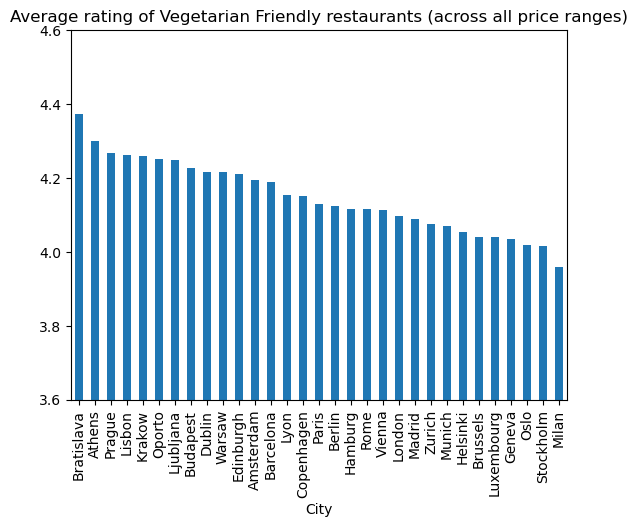

In [208]:
veggie_rating_by_city = veggie.groupby('City')['Rating'].mean()
sorted_veggie_rating = veggie_rating_by_city.sort_values(ascending=False)
plt.ylim(3.6, 4.6)
sorted_veggie_rating.plot(kind="bar")
plt.title("Average rating of Vegetarian Friendly restaurants (across all price ranges)")

### Answer to Question 2

The highest rated cities can be easily read from the two plots above. Krakow, Prague, and Athens appear in the Top 5 on both plots.

### Question 3: Which cities would be good candidates for opening an American restaurant?

Our approach here will be to look for the cities with the **smallest** fraction of American restaurants with an average rating of 4.5 or 5 stars. A new high-quality American restaurant there would have less competition and would more likely succeed.

First, we create a pandas series from **df** by using **str.contains** to search for **American.**  

In [209]:
american = df[df['CuisineStyle'].str.contains('American')]

If we drop all columns except **City** and **Rating,** we'll be able to easily use a lambda function to tally the number of 4.5 or 5 star ratings (restaurants with Rating > 4). But because this use of column-dropping results in warnings, we also evaluate head(10) and tail(10) statements to make sure things look ok before we apply the lambda function.

In [148]:
american.drop('Name', axis=1, inplace=True)
american.drop('CuisineStyle', axis=1, inplace=True)
american.drop('PriceRange', axis=1, inplace=True)
american.drop('NumberOfReviews', axis=1, inplace=True)
american.head(10)

/tmp/ipykernel_11261/771102447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.drop('Name', axis=1, inplace=True)
/tmp/ipykernel_11261/771102447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.drop('CuisineStyle', axis=1, inplace=True)
/tmp/ipykernel_11261/771102447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.drop('PriceRange', axis=1, inplace=True)
/tmp/ipykernel_11261/771102447.py:4: Setting

,City,Rating
10,Amsterdam,4.5
31,Amsterdam,4.5
32,Amsterdam,4.5
33,Amsterdam,4.5
72,Amsterdam,4.5
79,Amsterdam,4.5
85,Amsterdam,4.5
90,Amsterdam,4.5
91,Amsterdam,4.5
93,Amsterdam,4.5


In [149]:
american.tail(10)

,City,Rating
125046,Zurich,3.0
125048,Zurich,4.0
125083,Zurich,3.5
125202,Zurich,3.0
125273,Zurich,3.0
125308,Zurich,3.0
125324,Zurich,3.0
125376,Zurich,3.0
125385,Zurich,3.0
125390,Zurich,3.0


The head and tail look ok, so now we can apply the lambda function, calculate fractions, and make the plot.

<Axes: xlabel='City'>

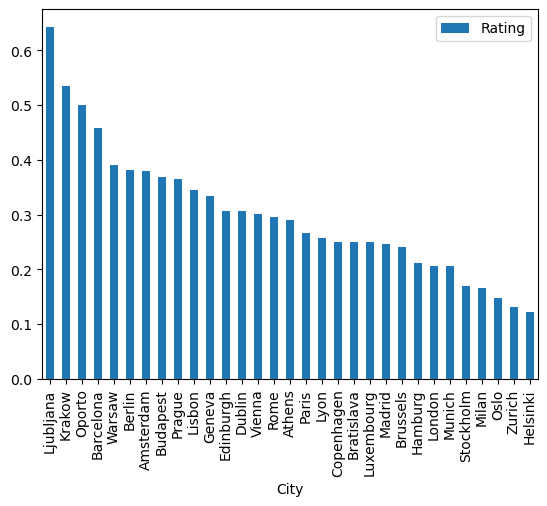

In [153]:
grouped = american.groupby('City')
fraction = grouped.apply(lambda x: (x > 4).mean())
sorted_fraction = fraction.sort_values(by='Rating',ascending=False)
sorted_fraction.plot(kind="bar")

### Answer to Question 3

Best candidates: Helsinki, Zurich, Oslo, Milan, Stockholm. In those cities, less than 20% of American restaurants have a 4.5 or 5 rating.

This completes our analysis to answer the three questions posed in the blog post.  Happy travels!